<a href="https://colab.research.google.com/github/Abhi-1114/projects/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install yfinance tensorflow scikit-learn matplotlib

In [7]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = 'GOOGL'
start_date = '2010-01-01'
# Remove end_date to get the latest data

# Download the data
stock_data = yf.download(ticker_symbol, start=start_date)

# Display the first few rows of the data
display(stock_data.head())

/tmp/ipython-input-417746767.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2010-01-04,15.576998,15.645595,15.514616,15.581968,78169752
2010-01-05,15.508402,15.604089,15.447511,15.587685,120067812
2010-01-06,15.117455,15.554879,15.070234,15.554879,158988852
2010-01-07,14.765528,15.160701,14.729491,15.145788,256315428
2010-01-08,14.962369,14.992938,14.641508,14.713335,188783028


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' price column
data = stock_data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print("Data preparation complete. Shapes of training and testing data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data preparation complete. Shapes of training and testing data:
X_train shape: (3134, 60, 1)
y_train shape: (3134,)
X_test shape: (784, 60, 1)
y_test shape: (784,)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

print("Model training complete.")

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0021 - val_loss: 4.7335e-04
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 1.6962e-04 - val_loss: 4.7214e-04
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 1.4559e-04 - val_loss: 5.4811e-04
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 1.1610e-04 - val_loss: 5.5882e-04
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 1.2037e-04 - val_loss: 0.0012
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 1.0723e-04 - val_loss: 5.4168e-04
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 1.0643e-04 - val_loss: 8.9784e-04
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 1.0554e-04 - val_loss: 0.0011
Epoch 9/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 8.8605e-05 - val_loss: 5.6128e-04
Epoch 10/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 9.1494e-05 - val_loss: 3.5504e-04
Epoch 11/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 8.6256e-05 - val_loss: 4.1063e-

In [11]:
# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions to get actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the actual prices for comparison
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

print("Prediction complete.")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Prediction complete.


In [10]:
display(stock_data.tail())

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-10-21,250.460007,254.880005,244.149994,254.740005,47312100
2025-10-22,251.690002,256.359985,249.289993,254.369995,35029400
2025-10-23,253.080002,255.039993,251.850006,252.979996,19901400
2025-10-24,259.920013,261.679993,255.320007,256.579987,28655100
2025-10-27,269.269989,270.140015,264.279999,264.820007,35159500


In [14]:
# Fetch the latest stock info using yfinance
ticker = yf.Ticker(ticker_symbol)
live_info = ticker.info

# Extract and display relevant information
previous_close = live_info.get('previousClose')
current_price = live_info.get('regularMarketPrice')
todays_change = live_info.get('regularMarketChange')
market_cap = live_info.get('marketCap')

print(f"Previous Close: {previous_close:.2f}")
print(f"Current Price: {current_price:.2f}")
print(f"Today's Change: {todays_change:.2f}")
print(f"Market Cap: {market_cap}")

# Get the last 60 days of data from the scaled data
last_60_days = scaled_data[-look_back:]

# Reshape the data to be [samples, time steps, features]
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

# Predict the next day's closing price
predicted_next_day_price_scaled = model.predict(last_60_days)

# Inverse transform the prediction to get the actual price
predicted_next_day_price = scaler.inverse_transform(predicted_next_day_price_scaled)

print(f"Model Prediction for Next Day's Close: {predicted_next_day_price[0][0]:.2f}")

Previous Close: 259.92
Current Price: 269.27
Today's Change: 9.35
Market Cap: 3260134981632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model Prediction for Next Day's Close: 225.10


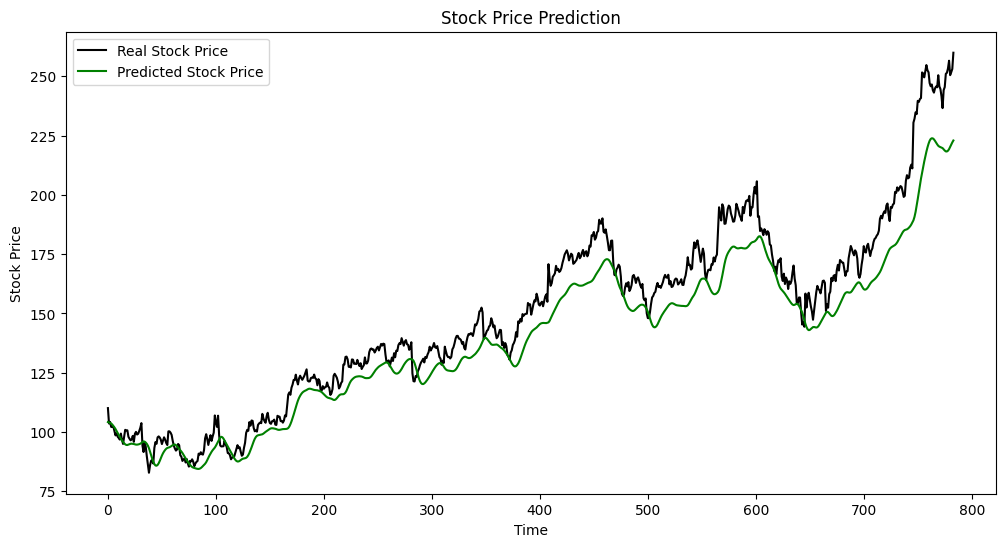

In [15]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()